## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [17]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df[['TV','Radio']]

,TV,Radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

G:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


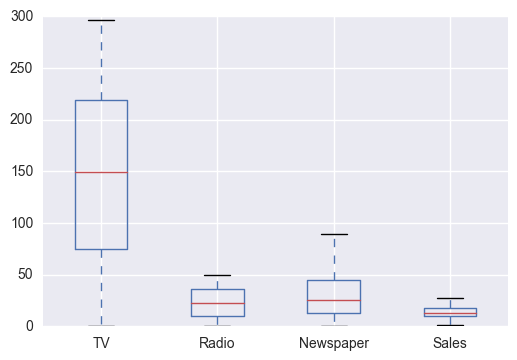

In [18]:
df.boxplot()
plt.show()

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

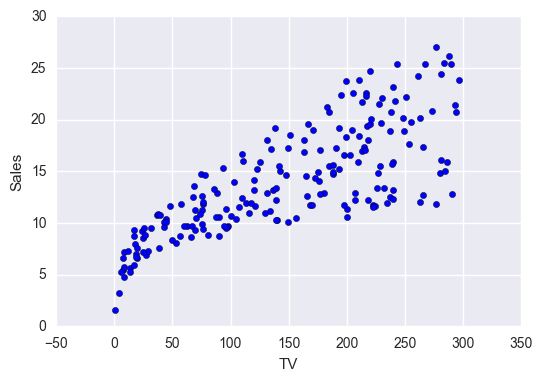

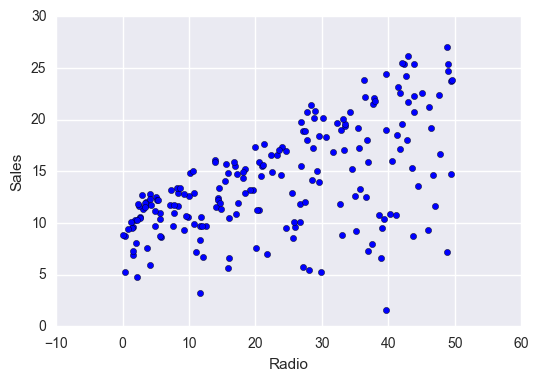

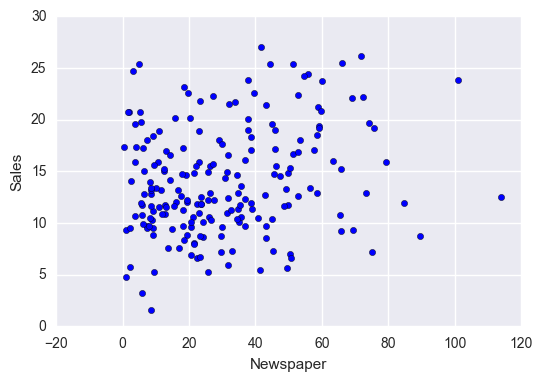

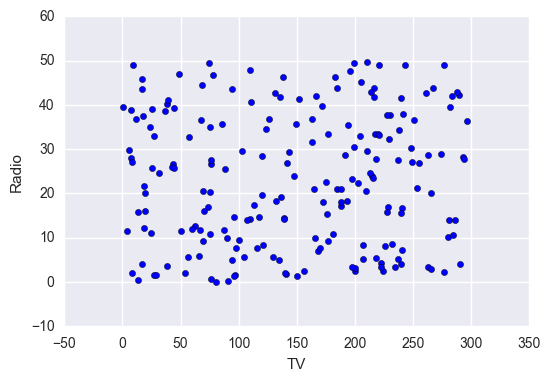

In [19]:
from pandas.tools.plotting import scatter_matrix 

plt.figure(1)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')

plt.figure(2)
plt.scatter(df.loc[:,'Radio'],df.loc[:,'Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.figure(3)
plt.scatter(df.loc[:,'Newspaper'],df.loc[:,'Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.figure(4)
plt.scatter(df.loc[:,'TV'],df.loc[:,'Radio'])
plt.xlabel('TV')
plt.ylabel('Radio')

Which of the variables seem correlated with one another? Which don't? Explain your answer

ANS: The strongest correlation is between 'Sales' and 'TV' as the is clear trend between the values in the scatter plot (increment in sales results from an increment in TV adverts). The relation between 'Sales' and 'Radio' is weaker, but is also easily observable looking at the scatter plot. There is no discernible relation between 'Sales' and 'Newspaper' as the scatter plot looks nebulous with no obvious trend.

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
#from sklearn.preprocessing import StandardScale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
import numpy.random as nprnd
import random
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

a) Set y to be the sales in df

In [2]:
y = df['Sales']

b) Set X to be just the features described above in df

In [3]:
x = df[['TV', 'Radio', 'Newspaper']]

In [4]:
x.shape

(200, 3)

c) Randomly split data into training and testing - 80% training, 20% testing.

In [5]:
x_train = x[0:int(200*0.8)]
x_test = x[int(200*0.8):]
y_train = y[0:int(200*0.8)]
y_test = y[int(200*0.8):]

d) Train model on training data, and make predictions on testing data

In [22]:
regr = LinearRegression()
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [23]:
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_test, y_test))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


ANS: The variance score of 0.90 shows that the predicted model is close to the actual one. Closer the value is to one stronger the model is. In addition, the residual sum of squares in this case is 2.79; this term shows how close the points are to the line of least squares and a smaller value indicates a better fit.

f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

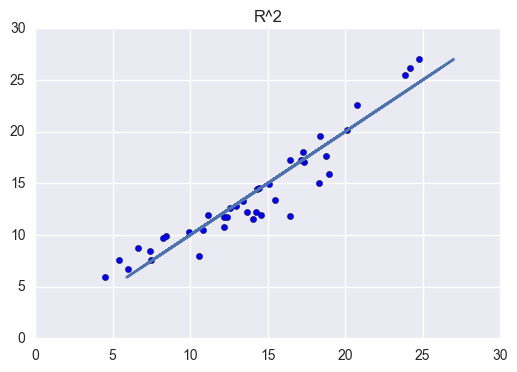

In [24]:
plt.figure
plt.title('R^2')
plt.scatter(regr.predict(x_test),y_test)
plt.plot(y_test,y_test)

ANS: Yes, the fit seems like a good model from how well the line follows the observations.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

ANS: From looking at the coefficients it is possible to discern that for an increase in TV advertising of 1000 dollars, the sale of items increases by 47 units. 1000 dollars spent on Radio ads cause an increase of 180 units. The negative coefficient for Newspaper indicates a weak negative relation between Newspaper ads and sales. 1000 dollars spent on ads in Newspapers resulted in a drop in sales of 1 unit of the item.

It is also important to look at the p-values to determine the significance of the association. 

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

ANS: The "Advertising" model makes a couple assumptions about the nature of the relatinship between the predictors (TV, Radio, Newspaper advertising expenditure) and the response (Sales). The relationship is assumed to be additive and linear, which may not necessarily be the case. The additive relationship assumes that the change in Sales caused by a modification to the value of TV ad expenditure is independent of the changes made to Radio and Newspaper ads expenditure. This assumption may not be valid and could result in an inaccurate model.

Correcting for this can be done by the inclusion of an additional "interaction term", which accounts for this dependence between thh predictors which was earlier overlooked. In the example below, including a new term with the formula "sm.ols(formula='Sales ~ TV * Radio', data = csv)" results in a fit with an R^2 value of 0.968. This is higher than the R^2 value of 0.897 obtained from just having the 2 predictors and making the additive assumption.

In addition, the assumption that the relationship between the predictors and the responmse is linear may not be true. This could be accounted for by the extending the linear model using polynomial regression.

In [ ]:
#Code credit: http://stackoverflow.com/questions/26431800/plot-linear-model-in-3d-with-matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
from matplotlib import cm

csv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

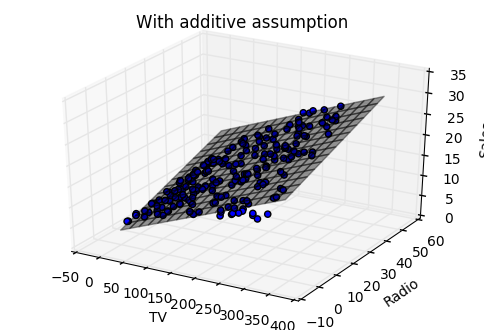

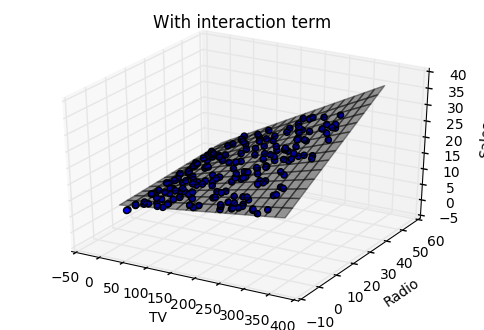

In [17]:
#Incorporating the interaction term in model2

model1 = sm.ols(formula='Sales ~ TV + Radio', data = csv)
model2 = sm.ols(formula='Sales ~ TV * Radio', data = csv)

fit1 = model1.fit()
fit2 = model2.fit()

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(111, projection='3d')

x_surf = np.arange(0, 350, 20)                # generate a mesh
y_surf = np.arange(0, 60, 4)
x_surf, y_surf = np.meshgrid(x_surf, y_surf)
exog = pd.core.frame.DataFrame({'TV': x_surf.ravel(), 'Radio': y_surf.ravel()})

out1 = fit1.predict(exog = exog)
ax1.plot_surface(x_surf, y_surf,
                out1.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax1.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax1.set_xlabel('TV')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
plt.title('With additive assumption')

fig2 = plt.figure(2)
ax2 = fig2.add_subplot(111, projection='3d')

out2 = fit2.predict(exog = exog)
ax2.plot_surface(x_surf, y_surf,
                out2.reshape(x_surf.shape),
                rstride=1,
                cstride=1,
                color='None',
                alpha = 0.4)

ax2.scatter(csv['TV'], csv['Radio'], csv['Sales'],
           c='blue',
           marker='o',
           alpha=1)

ax2.set_xlabel('TV')
ax2.set_ylabel('Radio')
ax2.set_zlabel('Sales')
plt.title('With interaction term')

plt.show()


In [13]:
fit1.summary() #Additive assumtion

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 15 Feb 2017   Prob (F-statistic):           4.83e-98
Time:                        03:20:07   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000         2.340     3.502
TV             0.0458      0.001     32.909      0.000         0.043     0.048
Radio          0.1880      0.008     23.382      0.000         0.172     0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
fit2.summary() #With interaction term

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 15 Feb 2017   Prob (F-statistic):          6.68e-146
Time:                        03:20:11   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000         6.261     7.239
TV             0.0191      0.002     12.699      0.000         0.016     0.022
Radio          0.0289      0.009      3.241      0.001         0.011     0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000         0.001     0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

In [100]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations, learning_rate):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}").format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    #print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}").format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')
        
def run_errorplot(num_iterations, learning_rate):
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = learning_rate
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iterations
    #print ("Starting gradient descent at b = {0}, m = {1}, error = {2}").format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    #print ("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    #print ("After {0} iterations b = {1}, m = {2}, error = {3}").format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    error =  compute_error_for_line_given_points(b, m, points)
    plt.scatter(num_iterations, error)

In the cells below I have compared plots by changing the learning rate and seeing how many runs it takes for convergence to be attained.

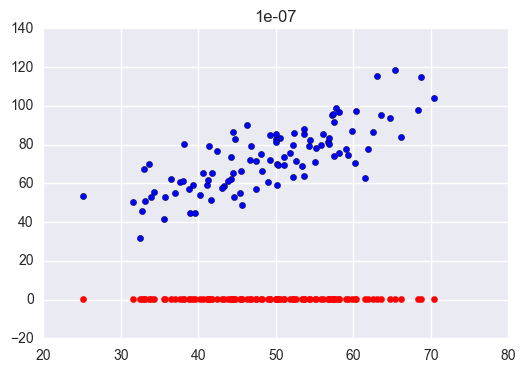

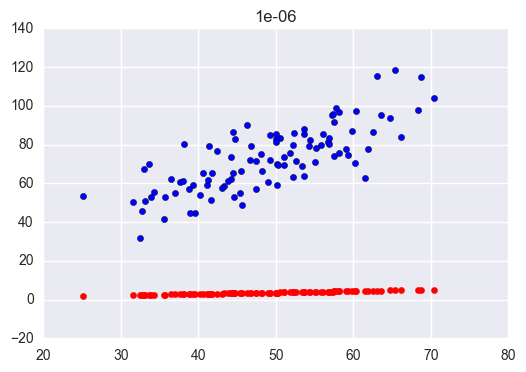

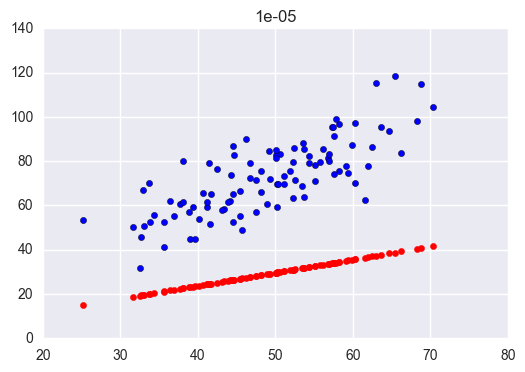

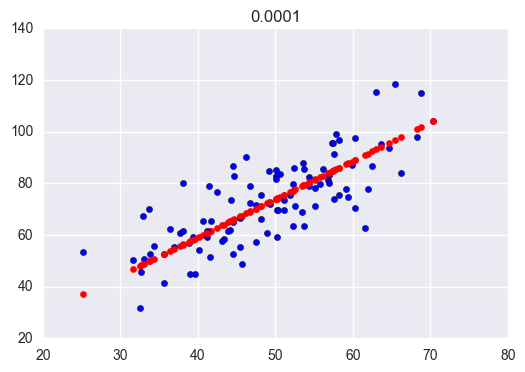

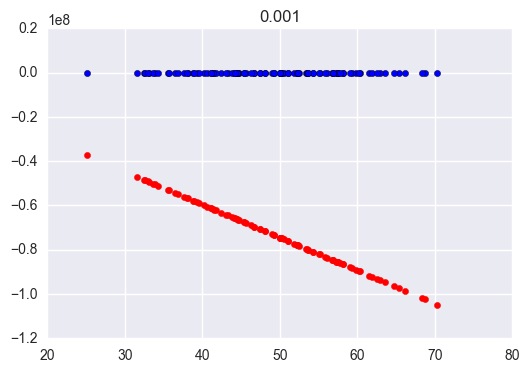

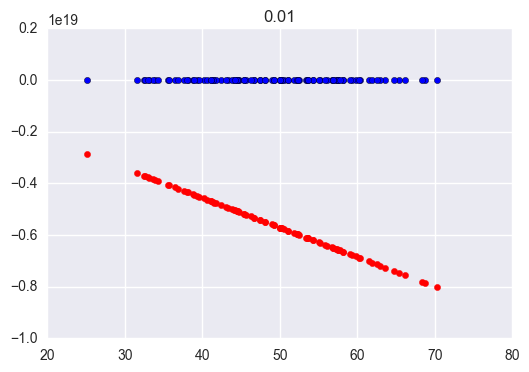

In [101]:
rate = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]
for learning_rate in rate:
    run(10, learning_rate)
    plt.title(learning_rate)
    plt.show()

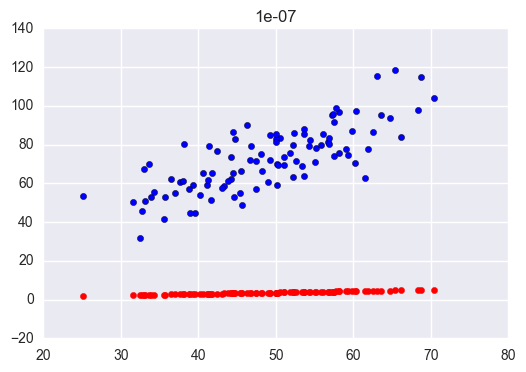

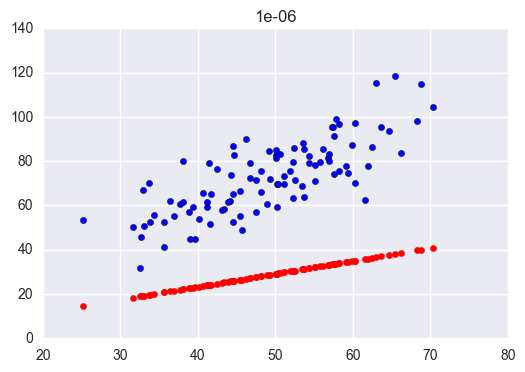

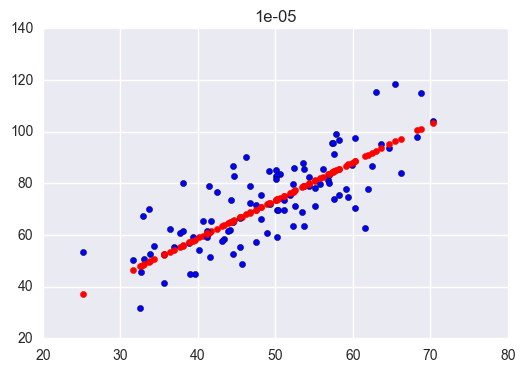

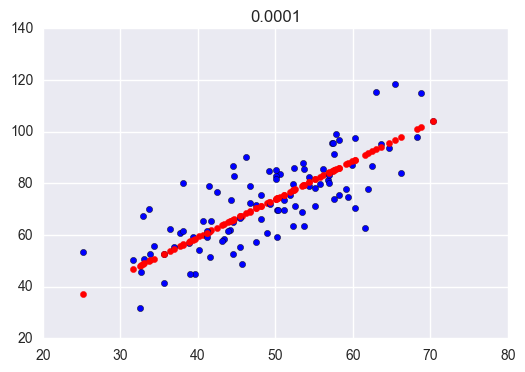

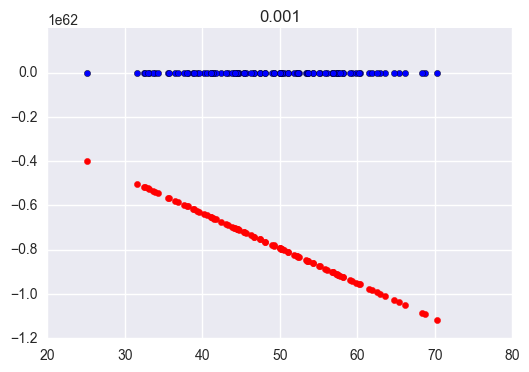

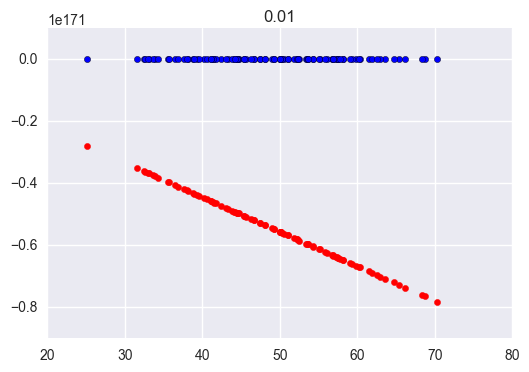

In [102]:
rate = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]
for learning_rate in rate:
    run(100, learning_rate)
    plt.title(learning_rate)
    plt.show()

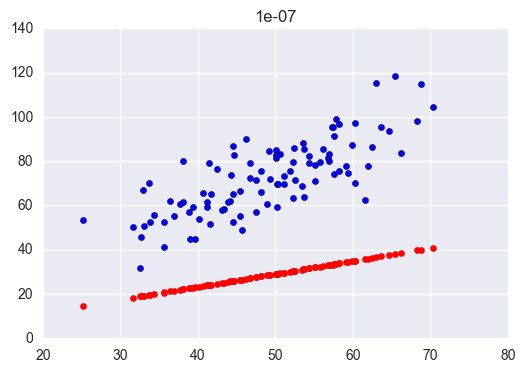

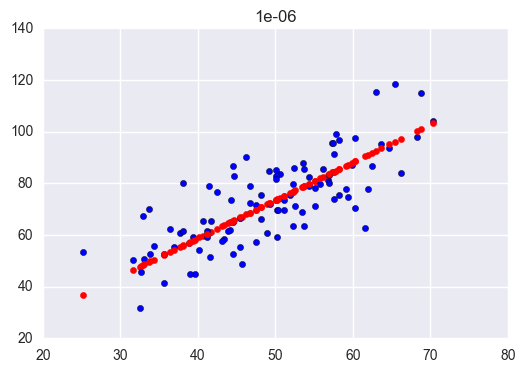

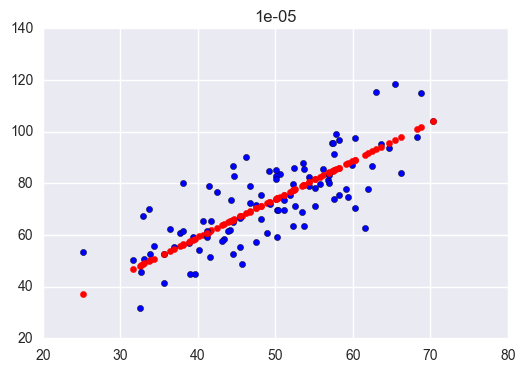

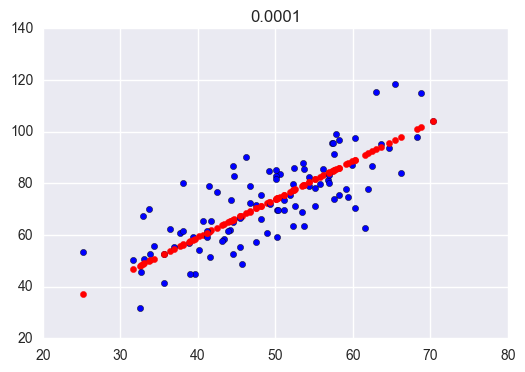

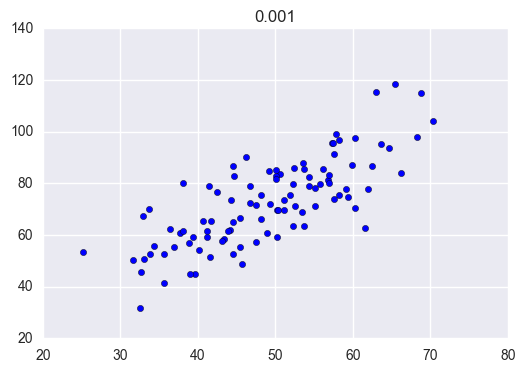

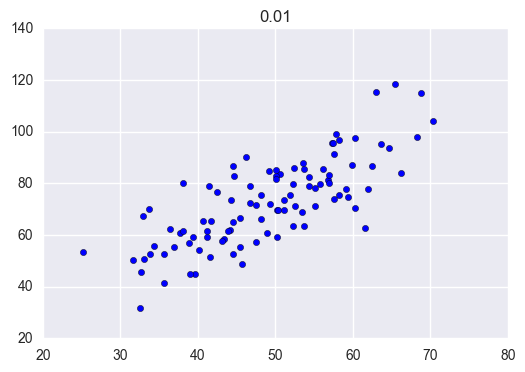

In [103]:
rate = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]
for learning_rate in rate:
    run(1000, learning_rate)
    plt.title(learning_rate)
    plt.show()

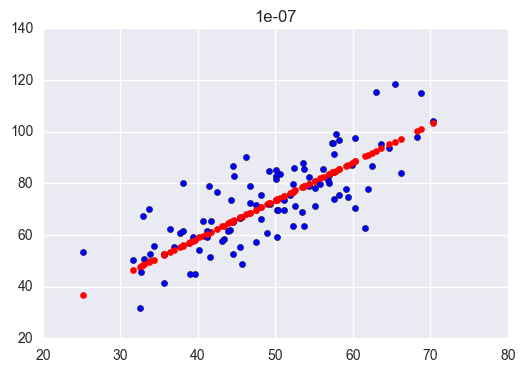

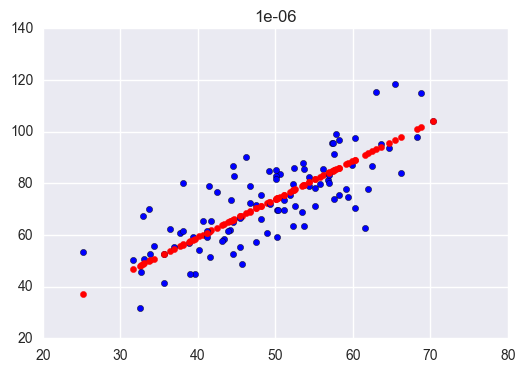

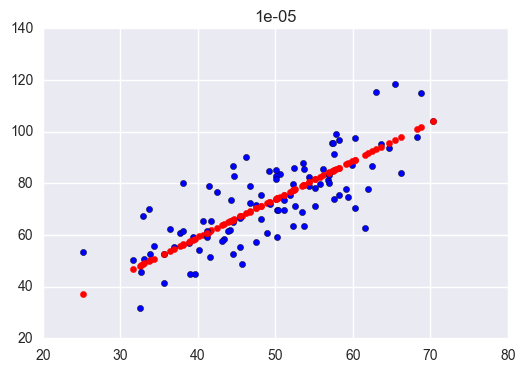

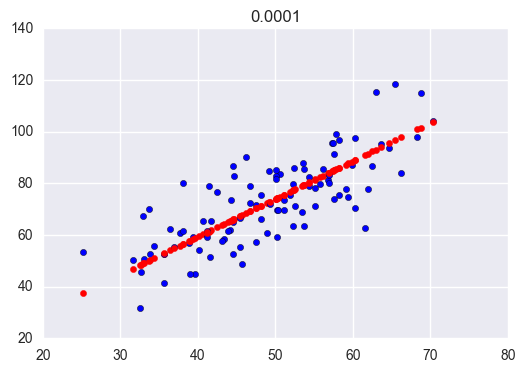

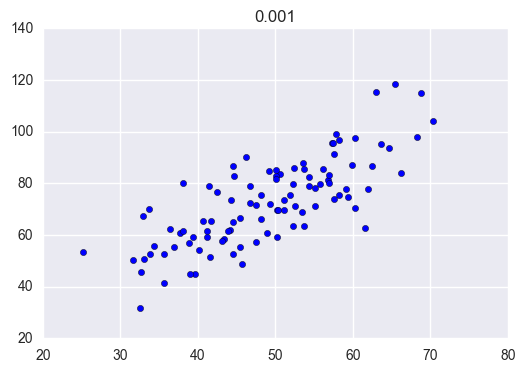

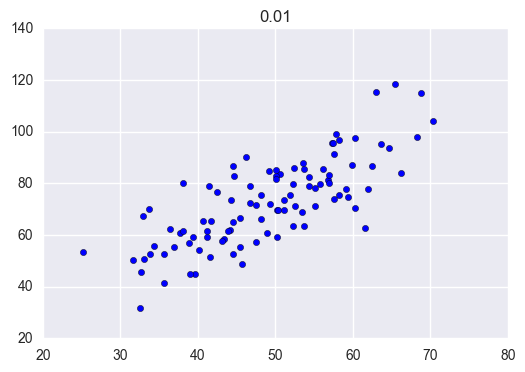

In [104]:
rate = [0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01]
for learning_rate in rate:
    run(10000, learning_rate)
    plt.title(learning_rate)
    plt.show()

ANS: As can be seen, with smaller learning rates the number of iterations required for convergence increases and in some instances it does not reach convergence at all. When the learning rate is 1e-07, it takes 10000 iterations to reach convergence, whereas a learning rate of 0.0001 ensures that convergence is attained in as little as 10 runs.

Running...


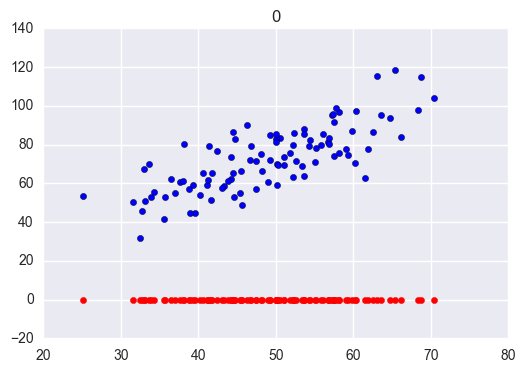

Running...


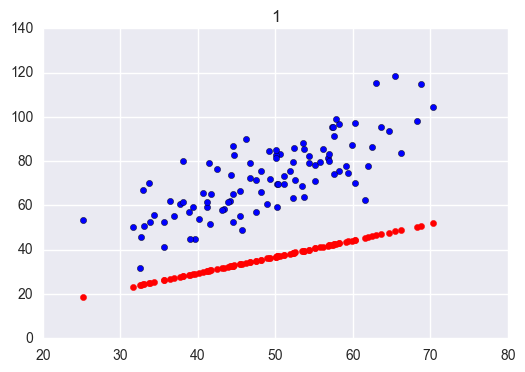

Running...


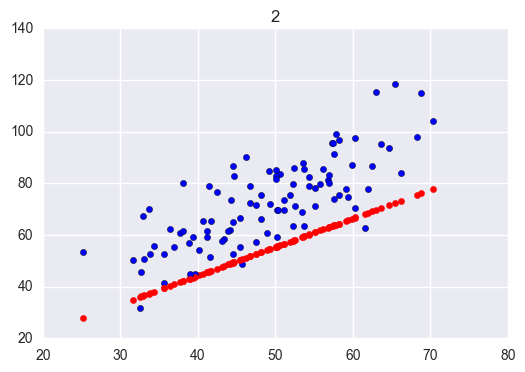

Running...


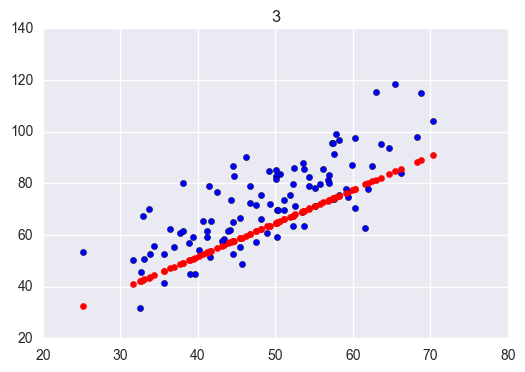

Running...


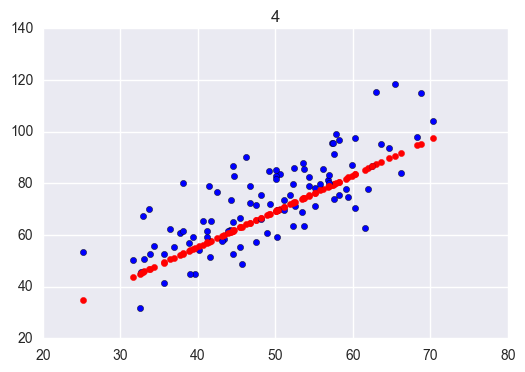

Running...


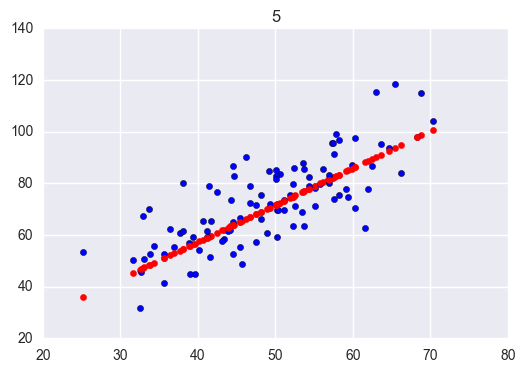

Running...


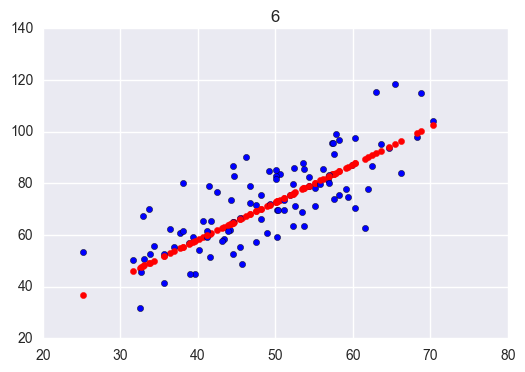

Running...


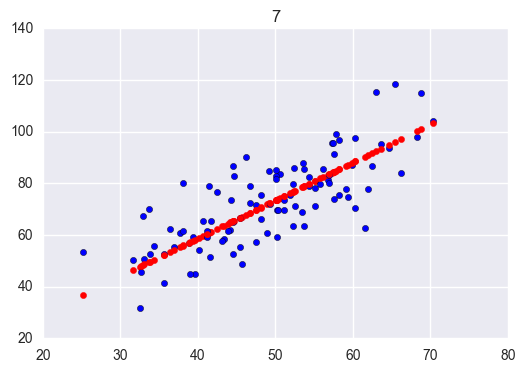

Running...


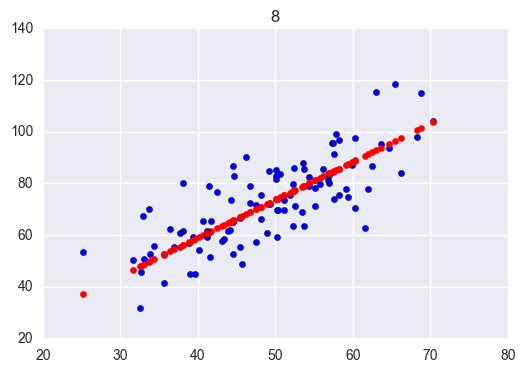

Running...


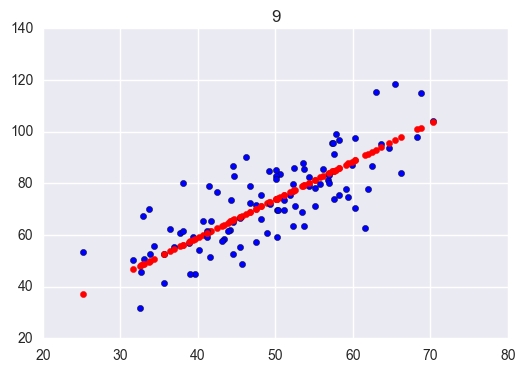

Running...


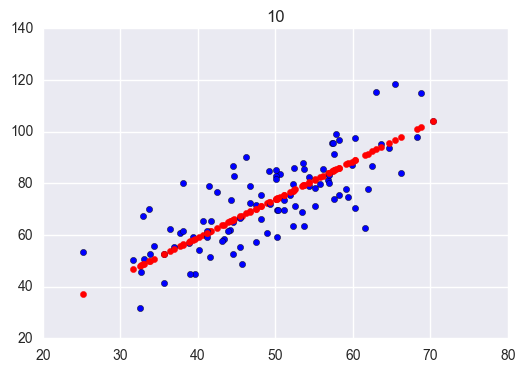

Running...


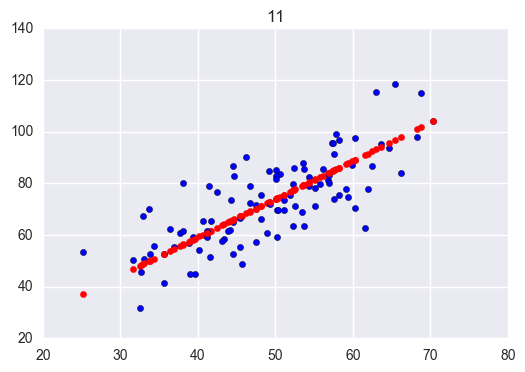

Running...


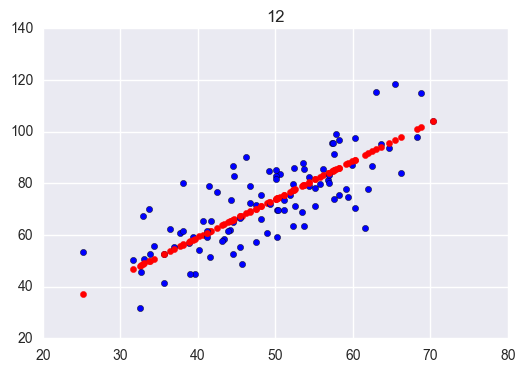

Running...


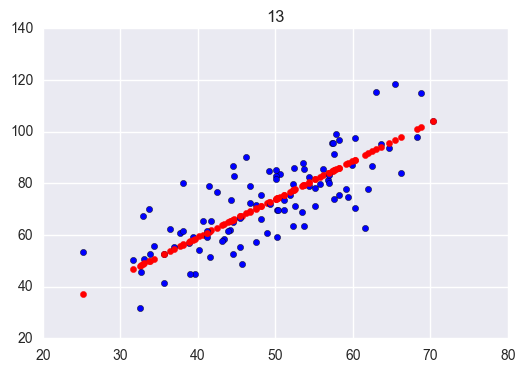

Running...


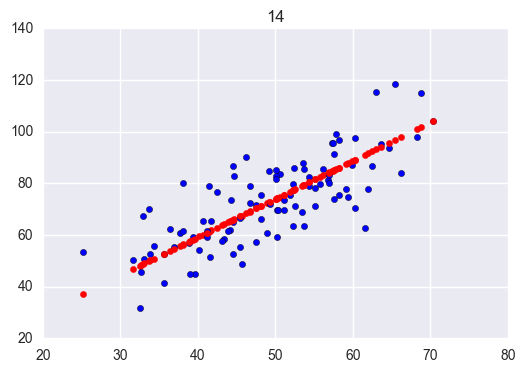

In [31]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,15):
    run(num, 0.0001)
    plt.title(num)
    plt.show()

ANS: The plots show that for a fixed learning rate the number of iterations determines attainment of convergence where increasing number of iterations --> convergence.

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.

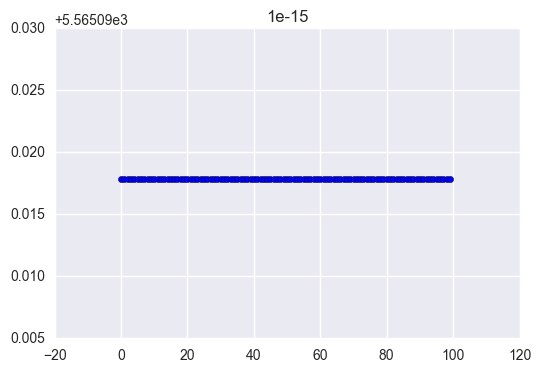

In [93]:
#Learning rate = 1e-15
Learning_rate = 1e-15
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)     

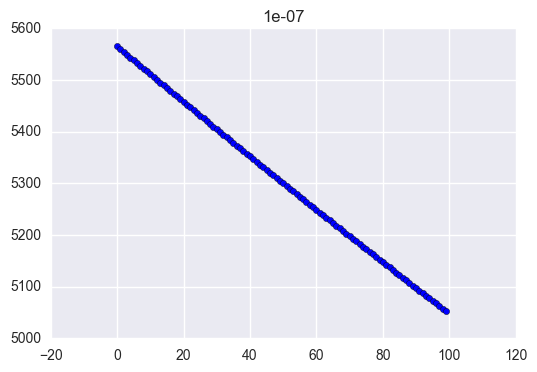

In [95]:
#Learning rate = 1e-8
Learning_rate = 1e-07
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

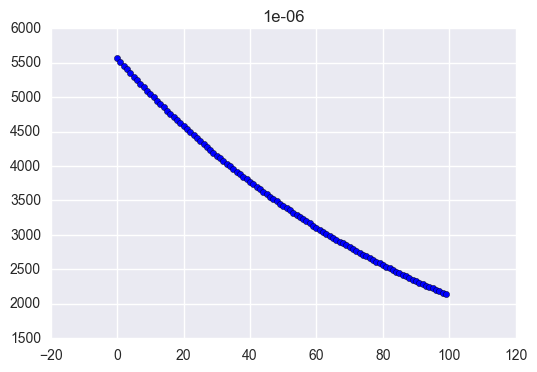

In [86]:
#Learning rate = 0.000001
Learning_rate = 1e-06
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

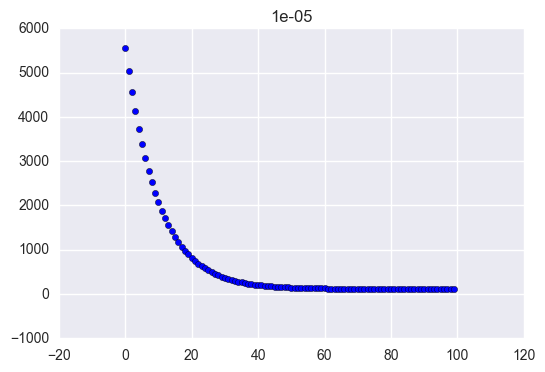

In [87]:
#Learning rate = 0.00001
Learning_rate = 1e-05
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

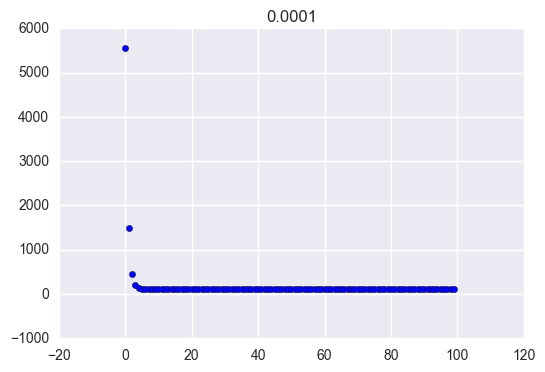

In [27]:
#Learning rate = 0.0001
Learning_rate = 0.0001
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

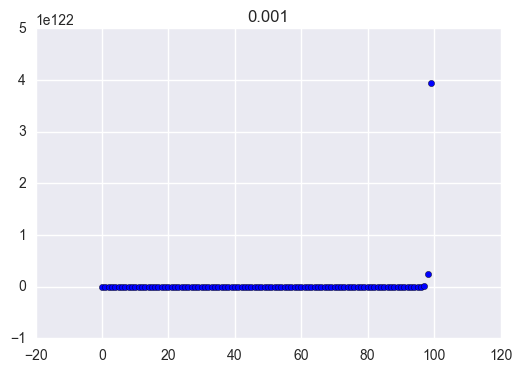

In [92]:
#Learning rate = 0.001
Learning_rate = 0.001
for num in range(0,100,1):
    run_errorplot(num, Learning_rate)
    plt.title(Learning_rate)

Explanation for error plot: At very low learning rates (LR) the error is a constant high value (learning rate of 1e-15 causes an error of 5.5e3) because the LR is too low to allow for convergence and hence the error is high over multiple runs. As the learning rate increases the error decreases with increasing number of runs in characterestic ways: LR of 1e-7 has a linear error vs number of iterations plot. LR of 1e-6 has a gradual curve in the ralationship and the relation is seemingly exponential for a LR of 1e-5. It is also important to note that with smaller LRs the error is higher at the end of 100 iterations, this is to be expected as it takes longer for convergence to be attaainaed with small LRs. High LRs of 0.0001 and 0.001 show an error plot of 0 error, this anomaly is also seen in the plots to check for convergence.